### Sub-Task 1

Create new feature(s) and strategies to improve feature's predictive power

**Prepping the data:**
- Address the outliers
- Handle the skewness with the appropriate transformation as inspected in task 2
- Normalizing or scalling the dataset before model development
- Train, test and split/ Kfold?

In [112]:
# Import the basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Load the data

from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

final_df = pd.read_csv('final_df', parse_dates=['date_activ', 'date_end','date_modif_prod','date_renewal','price_date'],date_parser=custom_date_parser)
final_df.drop(['days_diff','Unnamed: 0'], axis=1, inplace=True)
final_df.sample(2)

id                     channel_sales  \
12817   b8d9c54ee4a2ca39f3e0f4b842a27973  ewpakwlliwisiwduibdlfmalxowmwpci   
160844  61b90776b05ee22bfb8f8fc540e4847b  usilxuppasemubllopkaafesmlibmsdf   

        cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
12817      10694             0             2674 2013-04-01 2016-09-16   
160844     11461             0                0 2010-02-08 2016-02-08   

       date_modif_prod date_renewal  forecast_cons_12m  ...  \
12817       2015-09-16   2015-03-11             755.00  ...   
160844      2010-02-08   2015-02-09            1704.92  ...   

                               origin_up  pow_max  churn  price_date  \
12817   kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  2015-01-01   
160844  lxidpiddsbxsbosboudacockeimpuepw   12.500      0  2015-12-01   

        price_off_peak_var  price_peak_var price_mid_peak_var  \
12817             0.144431             0.0                0.0   
160844            0.145440             0.0                0.0   

        price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
12817            44.266931             0.0                 0.0  
160844           44.266930             0.0                 0.0  

[2 rows x 33 columns]

In [3]:
# Check the data types
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

### Feature Engineering

In [4]:
# Group off-peak prices by companies and month
monthly_price_by_id = final_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  00114d74e963e47177db89bc70108537                        -0.003994   
4  0013f326a839a2f6ad87a1859952d227                        -0.006171   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                       -0.000001  
4                        0.000000

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

array([[<AxesSubplot:title={'center':'price_date'}>,
        <AxesSubplot:title={'center':'price_off_peak_var'}>],
       [<AxesSubplot:title={'center':'price_off_peak_fix'}>,
        <AxesSubplot:>]], dtype=object)

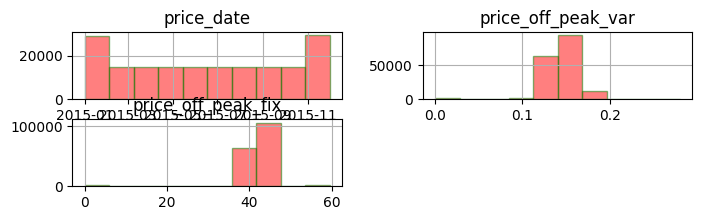

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = final_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

monthly_price_by_id.head()
monthly_price_by_id.hist(figsize=(8,2), color = "red", ec="green", alpha=0.5)


In [6]:
# Get january and december prices

jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

jan_prices.sample(2)
dec_prices.sample(2)

id price_date  price_off_peak_var  \
14565  ff5f7a0bbc4669be929bf4c1c9a9ef56 2015-01-01            0.127566   
12423  d9a98e337816bd45ad0f6281263ea582 2015-01-01            0.120052   

       price_off_peak_fix  
14565           40.565969  
12423           40.728885

id price_date  price_off_peak_var  \
9390  a57099ca668001e9e3be8f34b5e30b62 2015-12-01              0.1476   
5341  5da27f182bffa6cc92f3cf9666bb3503 2015-12-01              0.1476   

      price_off_peak_fix  
9390            44.44471  
5341            44.44471

In [7]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  00114d74e963e47177db89bc70108537                        -0.003994   
4  0013f326a839a2f6ad87a1859952d227                        -0.006171   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                       -0.000001  
4                        0.000000

In [8]:
#merge the datasets
df_merged = pd.merge(final_df,diff, on='id')
df_merged.sample(2)

id                     channel_sales  \
152575  70257bdd70bd85dff8167a3732e41dd3  foosdfpfkusacimwkcsosbicdxkicaua   
150762  9c9cc95eac9fa04d4916ba81de6b80a1  foosdfpfkusacimwkcsosbicdxkicaua   

        cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
152575     35530             0             3911 2011-05-10 2016-05-10   
150762     19773             0              138 2012-11-02 2016-09-01   

       date_modif_prod date_renewal  forecast_cons_12m  ...  churn  \
152575      2015-04-29   2015-05-14            3467.82  ...      0   
150762      2014-09-01   2015-09-02            3492.27  ...      0   

        price_date  price_off_peak_var  price_peak_var  price_mid_peak_var  \
152575  2015-07-01            0.125756         0.10408             0.07399   
150762  2015-04-01            0.191900         0.00000             0.00000   

        price_off_peak_fix price_peak_fix  price_mid_peak_fix  \
152575           40.728885       24.43733           16.291555   
150762           45.760930        0.00000            0.000000   

        offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
152575                        -0.008381                        0.162916  
150762                        -0.004545                        0.183779  

[2 rows x 35 columns]

In [9]:
#create more features.

# Aggregate average prices per period by company
avg_price = df_merged.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                             'price_mid_peak_var': 'mean','price_off_peak_fix': 'mean',
                                             'price_peak_fix': 'mean','price_mid_peak_fix': 'mean'}).reset_index()
avg_price.sample(2)

id  price_off_peak_var  price_peak_var  \
5951  67f5df00c93da0f74ae8bf37683ec482            0.149855             0.0   
2566  2bee185fd8c4f66c509d16a7444abe2f            0.146222             0.0   

      price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
5951                 0.0            44.35582             0.0   
2566                 0.0            44.35582             0.0   

      price_mid_peak_fix  
5951                 0.0  
2566                 0.0

In [10]:
# Create more features:

df_merged['tenure'] = ((df_merged['date_end']- df_merged['date_activ'])/(np.timedelta64(1, 'Y'))).round()

<AxesSubplot:xlabel='tenure', ylabel='churn'>

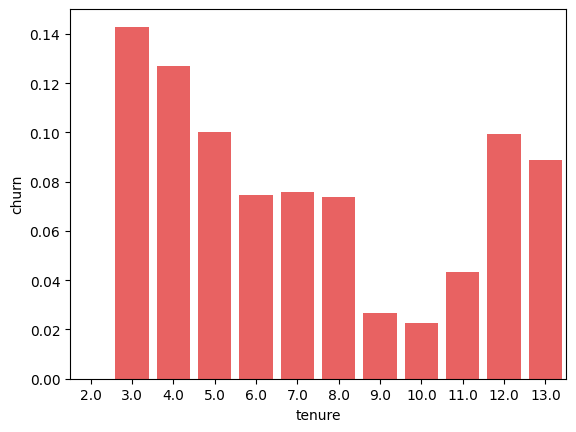

In [11]:
churn_rate = df_merged.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='tenure', ascending=True).reset_index()
sns.barplot(data = churn_rate, x='tenure', y='churn', color='red', alpha=0.7)

**Observations**

*From the above plot,we can see that there is a rise of customers of churning at the initial period (3rd year onwards and gradually decreases from fourth year and hits a stagnant point (from 6th yo 8th year), fluctuates afterwards. It is also obvious that the customers churning frequents at later stage too(11th year onwards). If we can find out the price fluctuations or any other contributing factors of them leaving, we can find a way to retain them.*

In [12]:
# Convert into months/years

def convertM(ref_date, df, column):
    m_diff = ref_date - df[column]
    months = (m_diff/ np.timedelta64(1, 'M'))
    return months

def convertY(ref_date, df, column):
    y_diff = ref_date - df[column]
    years = (y_diff/ np.timedelta64(1, 'Y')).astype(int)
    return years

In [13]:
df_merged.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'tenure'],
      dtype='object')

In [14]:
# Create reference date
ref_date = datetime(2016, 1, 1)

df_merged['active_Year'] = convertY(ref_date, df_merged,'date_activ')
df_merged['end_Year'] = convertY(ref_date, df_merged,'date_end')
df_merged['modif_prod_Year'] = convertY(ref_date, df_merged,'date_modif_prod')
df_merged['renewal_Year'] = convertY(ref_date, df_merged,'date_renewal')
df_merged['price_Year'] = pd.to_datetime(df_merged['price_date']).dt.year

df_merged['active_Month'] = convertM(ref_date, df_merged,'date_activ')
df_merged['end_Month'] = convertM(ref_date, df_merged,'date_end')
df_merged['modif_prod_Month'] = convertM(ref_date, df_merged,'date_modif_prod')
df_merged['renewal_Month'] = convertM(ref_date, df_merged,'date_renewal')
df_merged['price_Month'] = pd.to_datetime(df_merged['price_date']).dt.month

Text(0.5, 0.98, 'No.of Years and Consumption(power)')

<AxesSubplot:xlabel='modif_prod_Year', ylabel='cons_12m'>

<AxesSubplot:xlabel='renewal_Year', ylabel='cons_12m'>

<AxesSubplot:xlabel='active_Year', ylabel='cons_12m'>

<AxesSubplot:xlabel='end_Year', ylabel='cons_12m'>

<AxesSubplot:xlabel='price_Year', ylabel='cons_12m'>

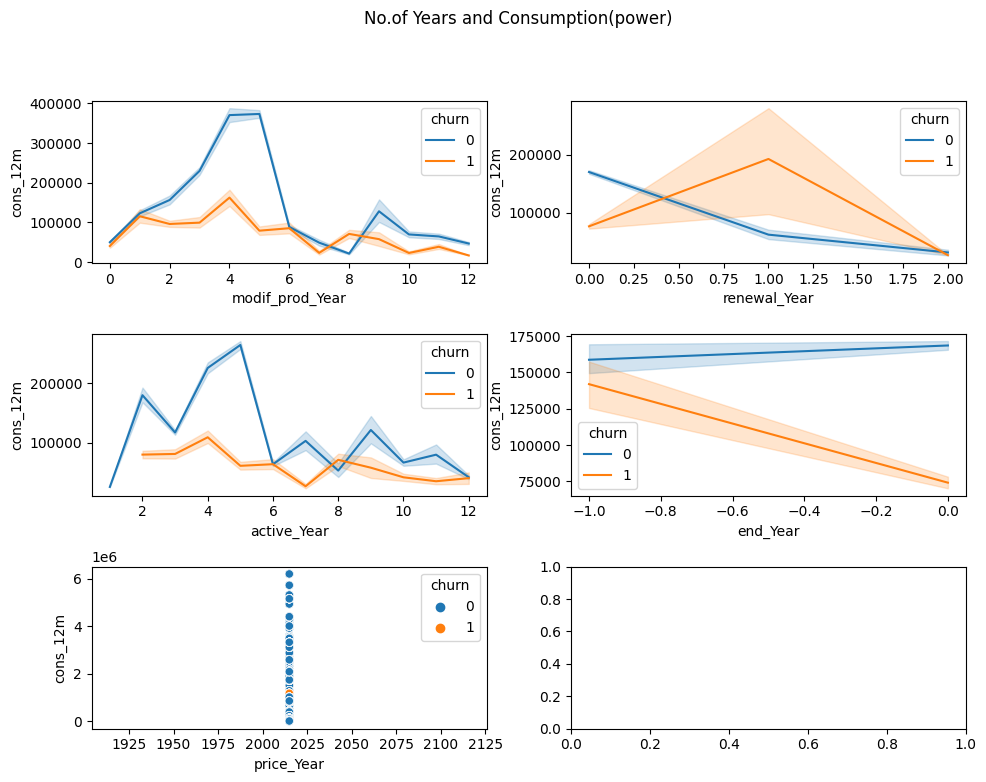

In [15]:
fig, axes = plt.subplots(3,2, figsize=(10,8))
fig.suptitle('No.of Years and Consumption(power)')
fig.tight_layout(pad=3.0)

sns.lineplot(ax=axes[0,0], data=df_merged, x='modif_prod_Year', y='cons_12m' , hue='churn')
sns.lineplot(ax=axes[0,1], data=df_merged, x='renewal_Year', y='cons_12m' , hue='churn' )
sns.lineplot(ax=axes[1,0], data=df_merged, x='active_Year', y='cons_12m' , hue='churn' )
sns.lineplot(ax=axes[1,1], data=df_merged, x='end_Year', y='cons_12m' , hue='churn' )
sns.scatterplot(ax=axes[2,0], data=df_merged, x='price_Year', y='cons_12m' , hue='churn' )

Text(0.5, 0.98, 'No.of Months and Consumption(power)')

<AxesSubplot:xlabel='modif_prod_Month', ylabel='cons_12m'>

<AxesSubplot:xlabel='renewal_Month', ylabel='cons_12m'>

<AxesSubplot:xlabel='active_Month', ylabel='cons_12m'>

<AxesSubplot:xlabel='end_Month', ylabel='cons_12m'>

<AxesSubplot:xlabel='price_Month', ylabel='cons_12m'>

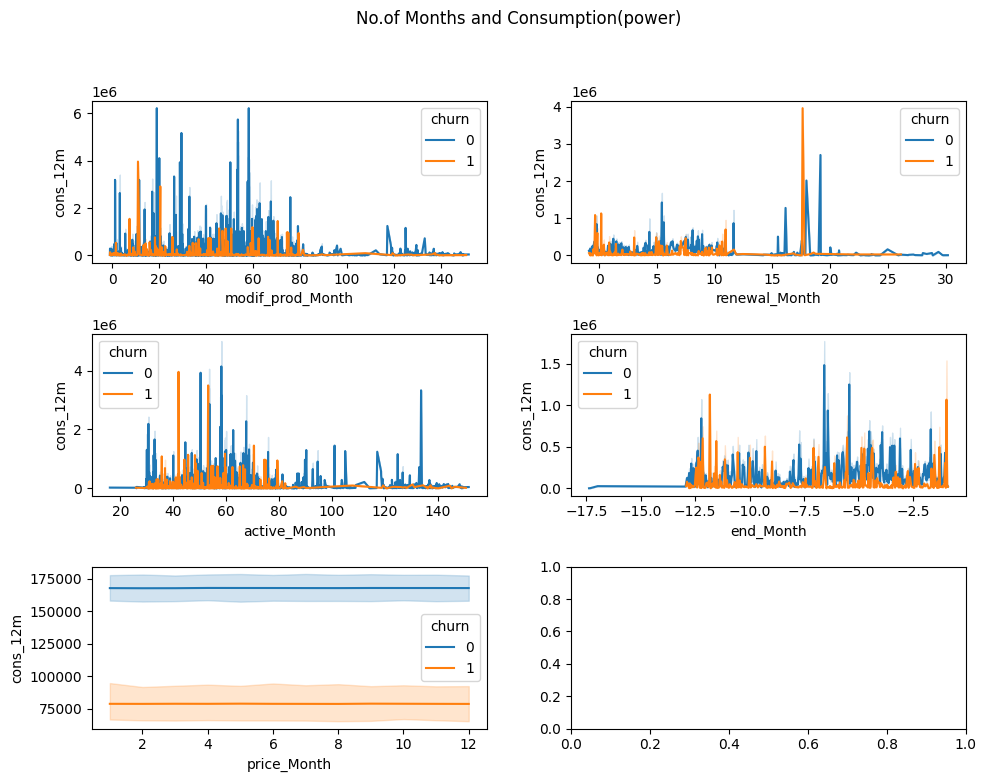

In [16]:
fig, axes = plt.subplots(3,2, figsize=(10,8))
fig.suptitle('No.of Months and Consumption(power)')
fig.tight_layout(pad=3.0)

sns.lineplot(ax=axes[0,0], data=df_merged, x='modif_prod_Month', y='cons_12m' , hue='churn')
sns.lineplot(ax=axes[0,1], data=df_merged, x='renewal_Month', y='cons_12m' , hue='churn' )
sns.lineplot(ax=axes[1,0], data=df_merged, x='active_Month', y='cons_12m' , hue='churn' )
sns.lineplot(ax=axes[1,1], data=df_merged, x='end_Month', y='cons_12m' , hue='churn' )
sns.lineplot(ax=axes[2,0], data=df_merged, x='price_Month', y='cons_12m' , hue='churn' )

<Figure size 1500x1500 with 0 Axes>

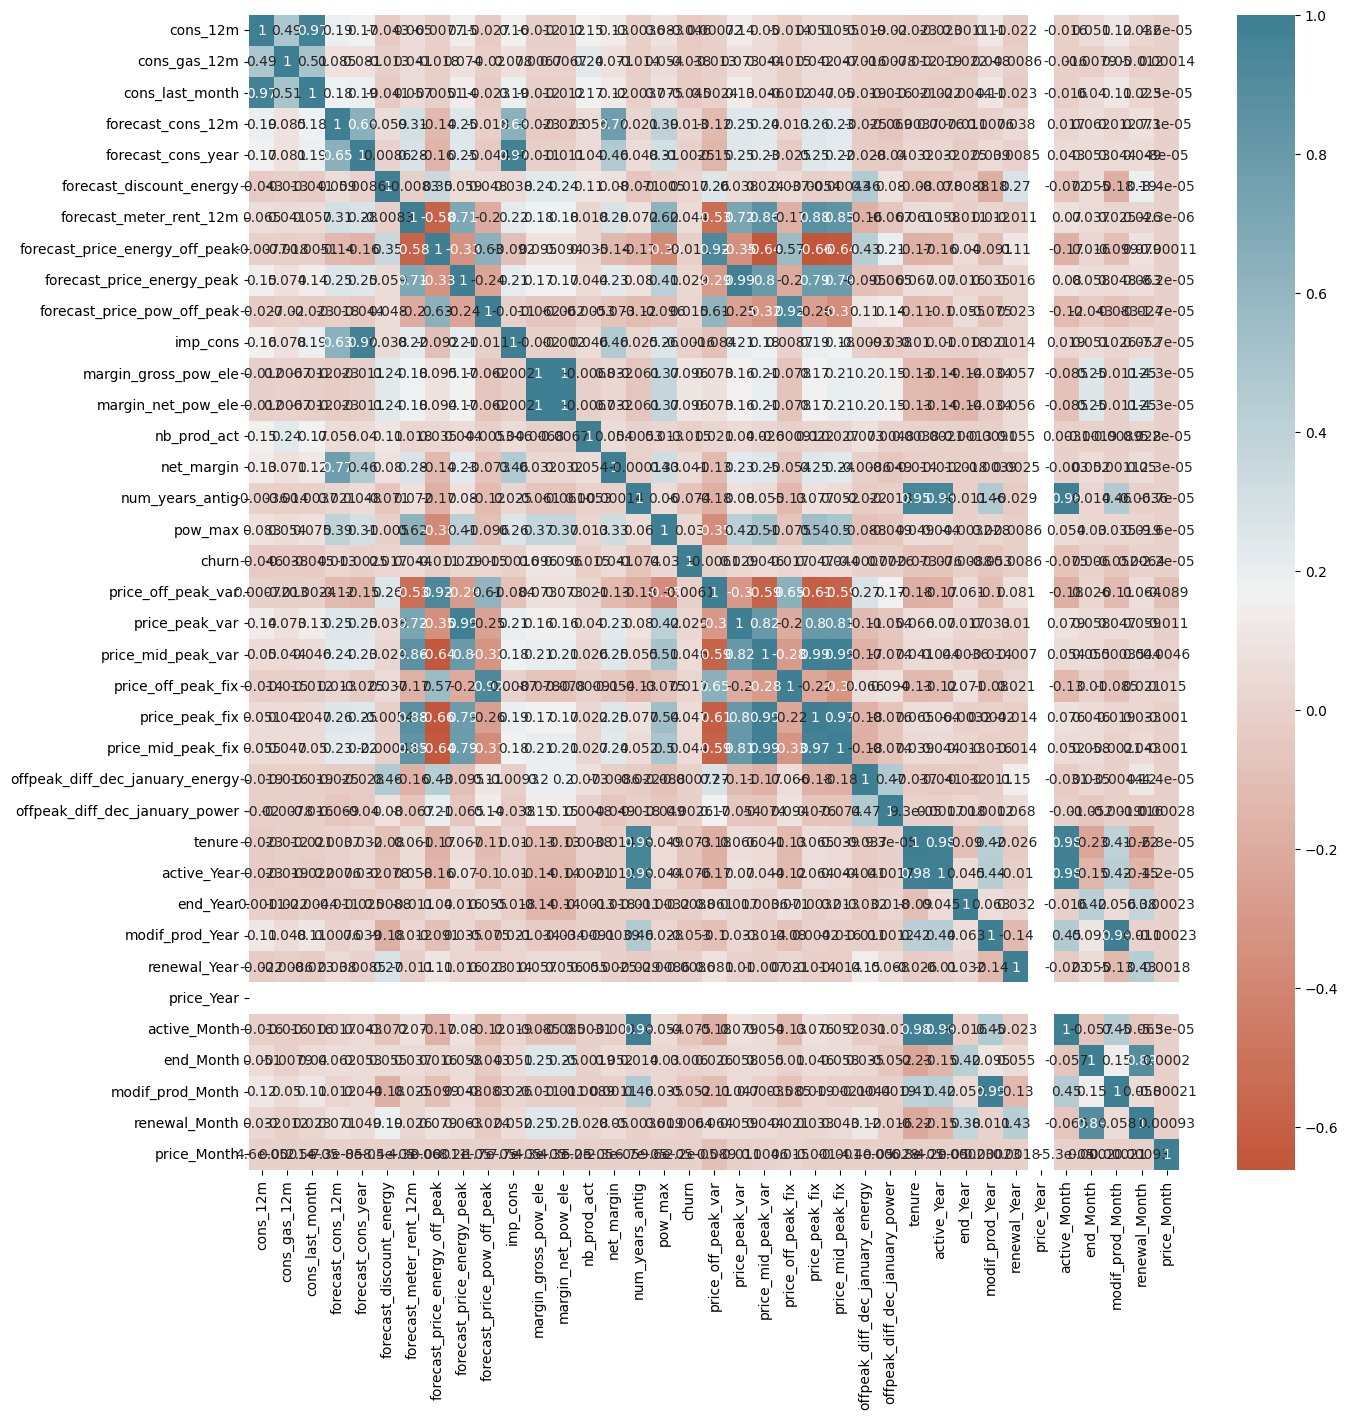

In [17]:
## Correlation analysis

plt.figure(figsize=(15,15))
corre=df_merged.corr()
ax=sns.heatmap(corre,annot=True,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [18]:
#Lets drop the not so relevant features:

df_merged.drop(['id','date_activ','date_end','date_modif_prod','date_renewal','price_date'], axis=1, inplace=True)

**A few preprocessing steps before splitting the dataset**

- Encoding
- Log transformation/Scalling/normalizing
- Random forest to select top 10 features


In [19]:
# Encoding

df_merged.dtypes.value_counts()
df_merged.select_dtypes('object')

float64    24
int64       9
int32       4
object      3
dtype: int64

channel_sales has_gas  \
0       foosdfpfkusacimwkcsosbicdxkicaua       t   
1       foosdfpfkusacimwkcsosbicdxkicaua       t   
2       foosdfpfkusacimwkcsosbicdxkicaua       t   
3       foosdfpfkusacimwkcsosbicdxkicaua       t   
4       foosdfpfkusacimwkcsosbicdxkicaua       t   
...                                  ...     ...   
175144                           MISSING       f   
175145                           MISSING       f   
175146                           MISSING       f   
175147                           MISSING       f   
175148                           MISSING       f   

                               origin_up  
0       lxidpiddsbxsbosboudacockeimpuepw  
1       lxidpiddsbxsbosboudacockeimpuepw  
2       lxidpiddsbxsbosboudacockeimpuepw  
3       lxidpiddsbxsbosboudacockeimpuepw  
4       lxidpiddsbxsbosboudacockeimpuepw  
...                                  ...  
175144  ldkssxwpmemidmecebumciepifcamkci  
175145  ldkssxwpmemidmecebumciepifcamkci  
175146  ldkssxwpmemidmecebumciepifcamkci  
175147  ldkssxwpmemidmecebumciepifcamkci  
175148  ldkssxwpmemidmecebumciepifcamkci  

[175149 rows x 3 columns]

In [20]:
# Encoding 'has_gas' column which has boolean values

df_merged['has_gas'] =df_merged['has_gas'].replace(['t','f'],[1,0])
df_merged['has_gas'].value_counts()

0    143364
1     31785
Name: has_gas, dtype: int64

In [21]:
# Encoding 'channel_sales' and 'origin_up' columns : 

df_merged['channel_sales'].value_counts()
df_merged['origin_up'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: channel_sales, dtype: int64

lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: origin_up, dtype: int64

In [22]:
df_merged = pd.get_dummies(df_merged,columns = ['channel_sales','origin_up'], drop_first = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 50 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   cons_12m                                        175149 non-null  int64  
 1   cons_gas_12m                                    175149 non-null  int64  
 2   cons_last_month                                 175149 non-null  int64  
 3   forecast_cons_12m                               175149 non-null  float64
 4   forecast_cons_year                              175149 non-null  int64  
 5   forecast_discount_energy                        175149 non-null  float64
 6   forecast_meter_rent_12m                         175149 non-null  float64
 7   forecast_price_energy_off_peak                  175149 non-null  float64
 8   forecast_price_energy_peak                      175149 non-null  float64
 9   forecast_price_pow_off_pea

In [30]:
# Transforming data to handle skewness

from skew_autotransform import skew_autotransform

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'cons_12m' had 'positive' skewness of 6.00

 Transformation yielded skewness of 0.21


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


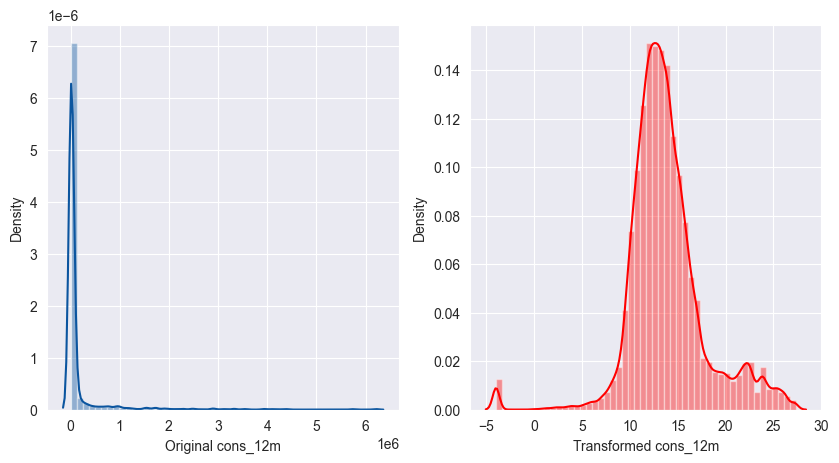

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'cons_gas_12m' had 'positive' skewness of 9.60

 Transformation yielded skewness of 1.68


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


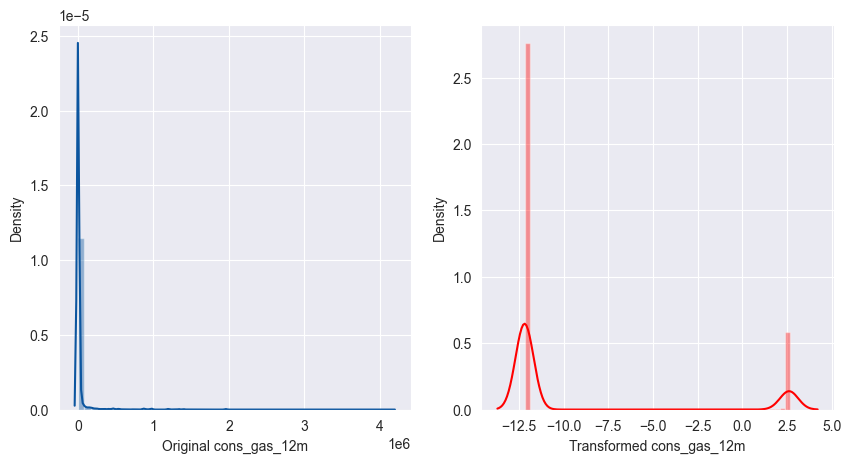

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'cons_last_month' had 'positive' skewness of 6.39

 Transformation yielded skewness of -0.20


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


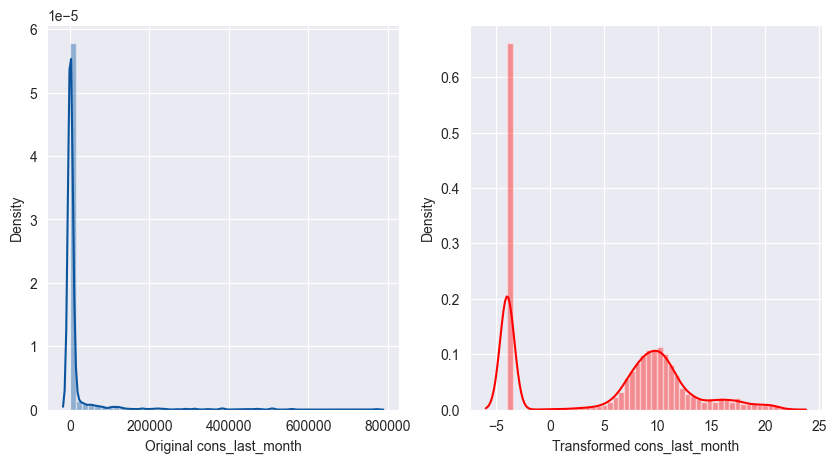

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'forecast_cons_12m' had 'positive' skewness of 7.16

 Transformation yielded skewness of 0.04


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


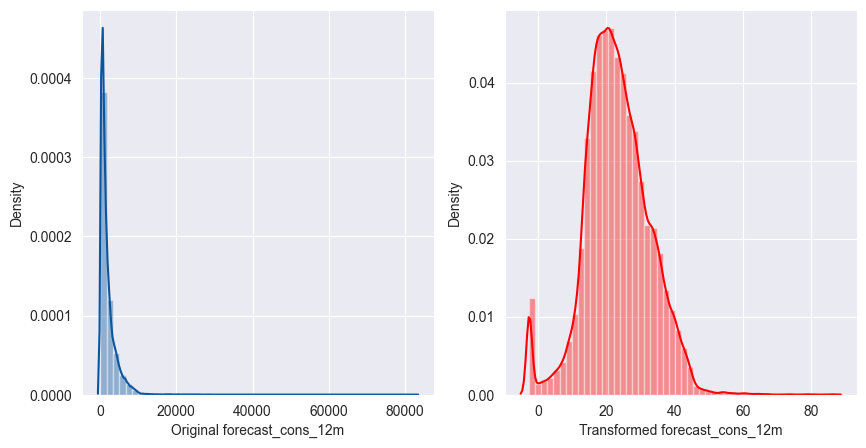

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'forecast_cons_year' had 'positive' skewness of 16.59

 Transformation yielded skewness of -0.18


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


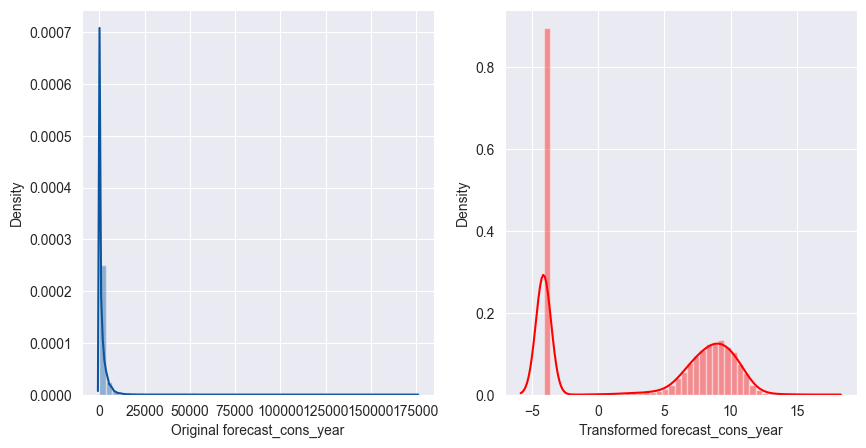

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'forecast_discount_energy' had 'positive' skewness of 5.15

 Transformation yielded skewness of 5.06


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


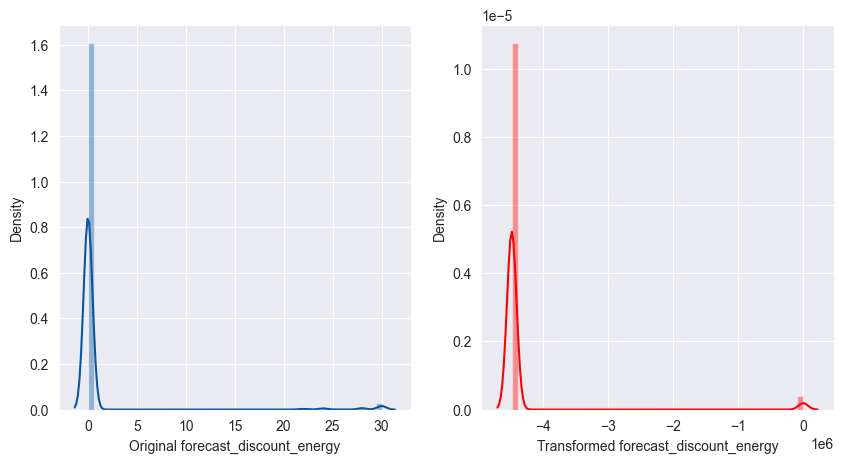

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'forecast_meter_rent_12m' had 'positive' skewness of 1.50

 Transformation yielded skewness of -0.10


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


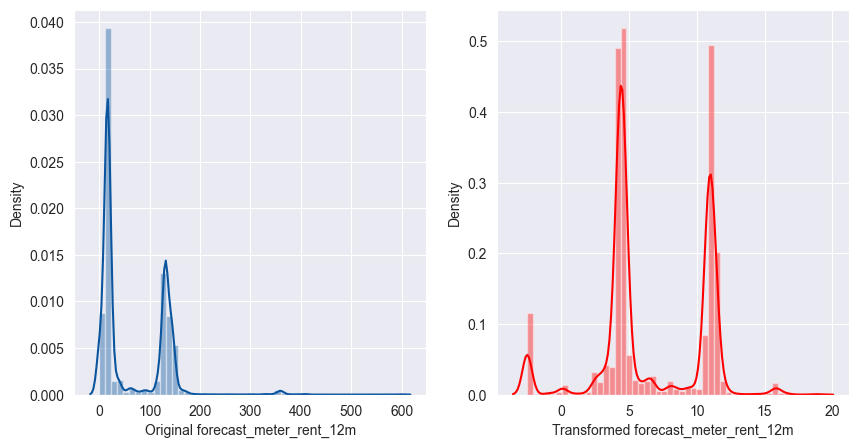

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'forecast_price_energy_off_peak' . Skewness = -0.12


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


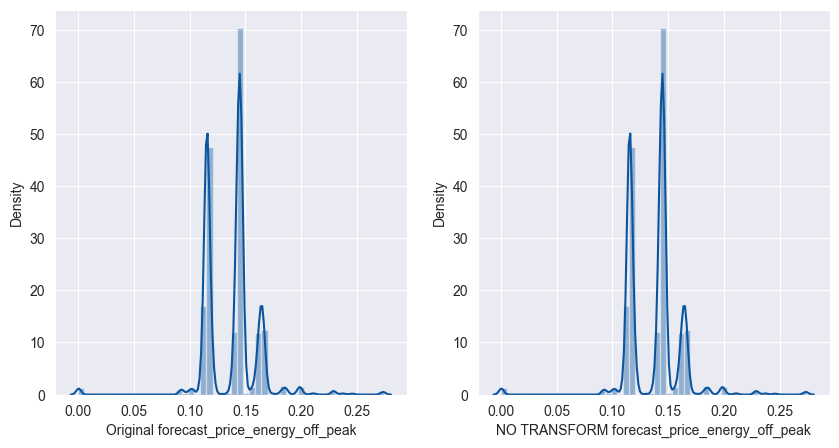

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'forecast_price_energy_peak' . Skewness = -0.01


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


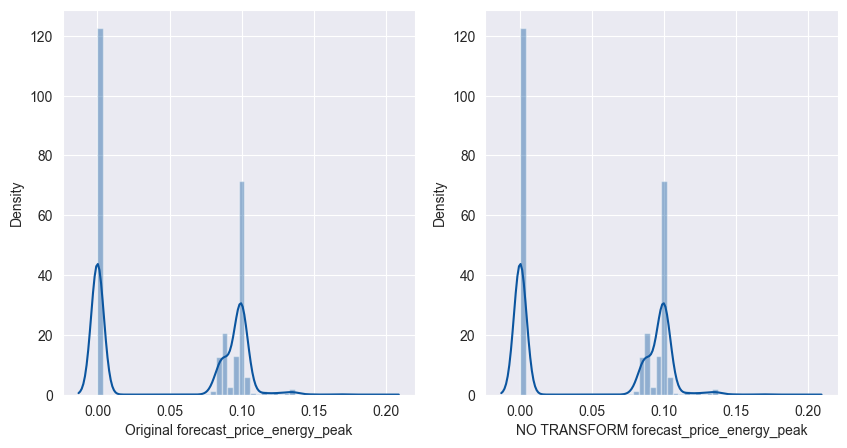

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'forecast_price_pow_off_peak' had 'negative' skewness of -5.00

 Transformation yielded skewness of 0.68


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


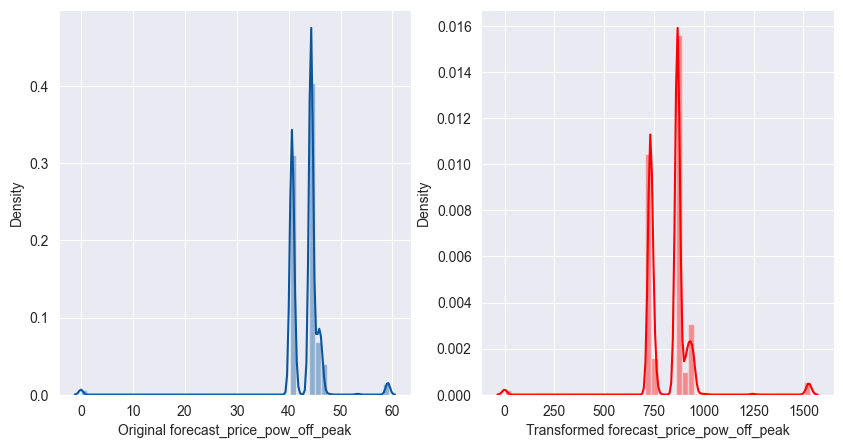

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'has_gas' had 'positive' skewness of 1.65

 Transformation yielded skewness of 1.65


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


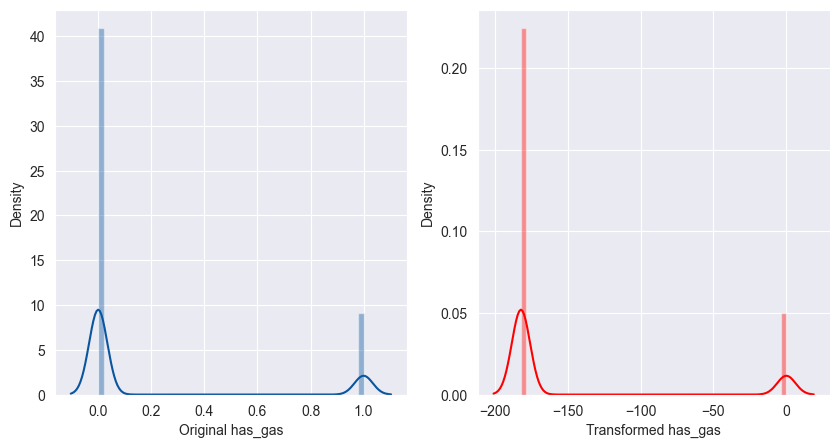

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'imp_cons' had 'positive' skewness of 13.20

 Transformation yielded skewness of -0.15


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


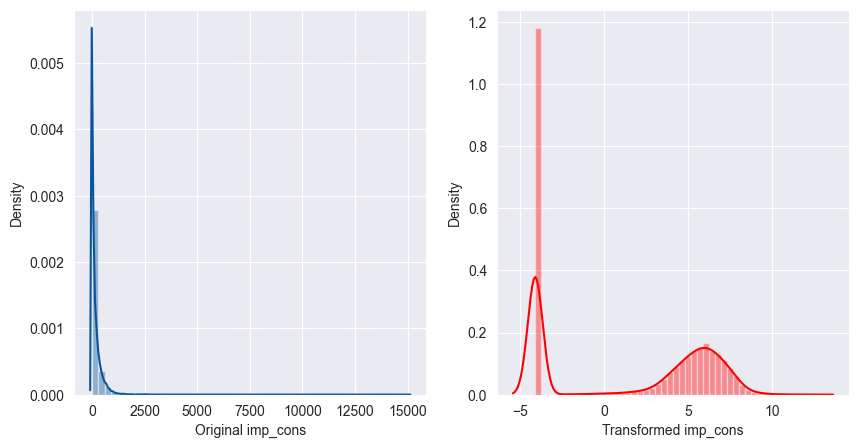

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'margin_gross_pow_ele' had 'positive' skewness of 4.47

 Transformation yielded skewness of 0.30


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


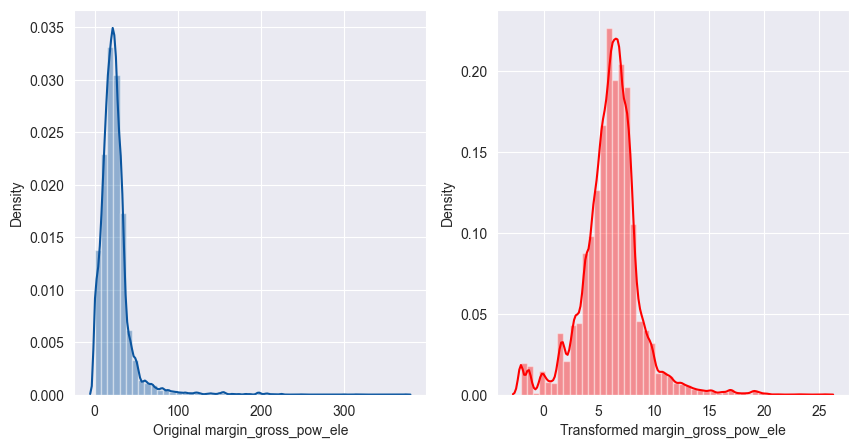

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'margin_net_pow_ele' had 'positive' skewness of 4.47

 Transformation yielded skewness of 0.30


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


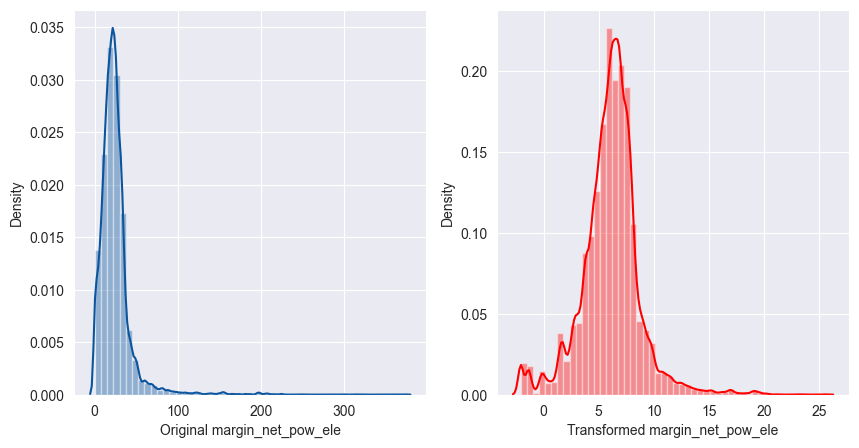

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'nb_prod_act' had 'positive' skewness of 8.64

 Transformation yielded skewness of 1.37


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


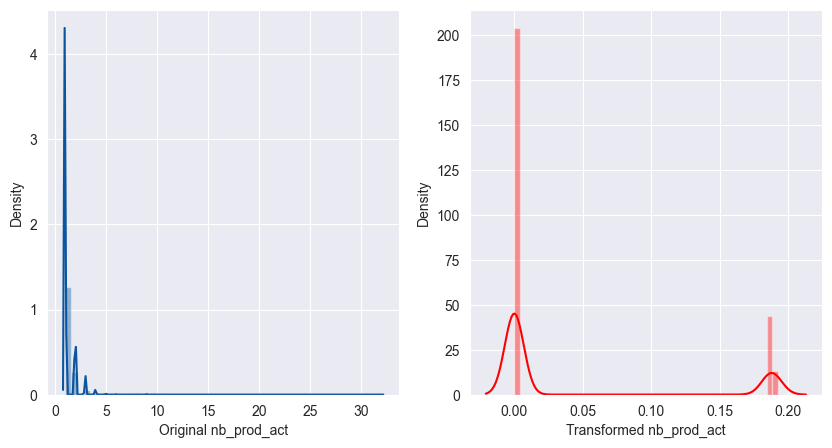

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'net_margin' had 'positive' skewness of 36.57

 Transformation yielded skewness of 0.10


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


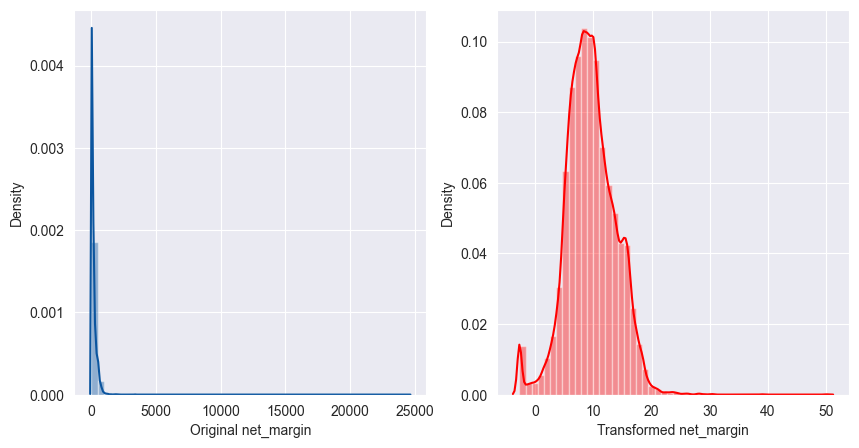

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'num_years_antig' had 'positive' skewness of 1.45

 Transformation yielded skewness of 0.00


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


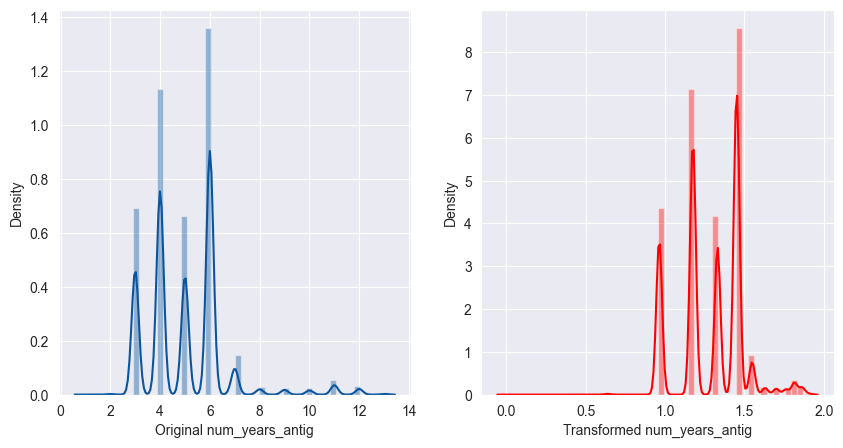

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'pow_max' had 'positive' skewness of 5.79

 Transformation yielded skewness of -0.18


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


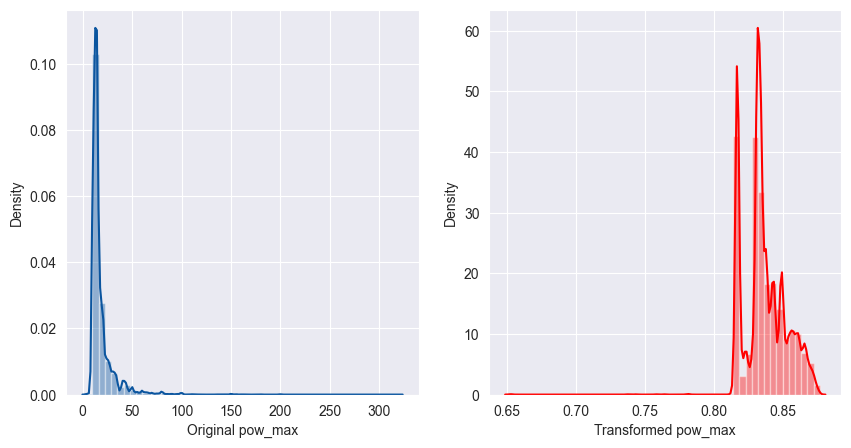

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'churn' had 'positive' skewness of 2.72

 Transformation yielded skewness of 2.72


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


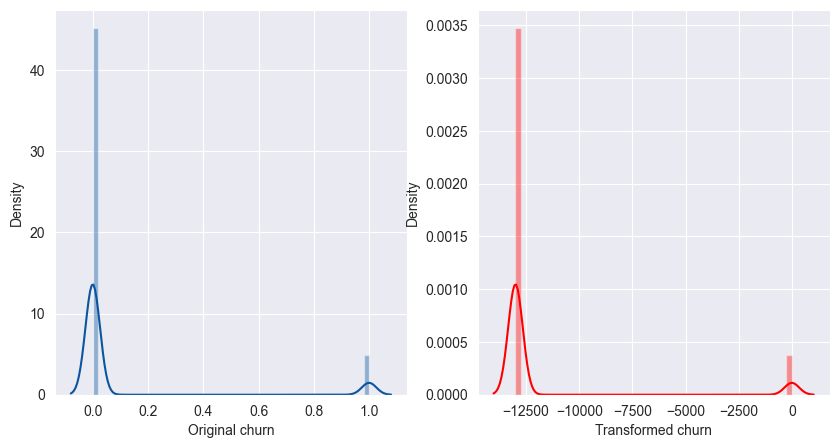

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'price_off_peak_var' had 'negative' skewness of -0.71

 Transformation yielded skewness of 0.76


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


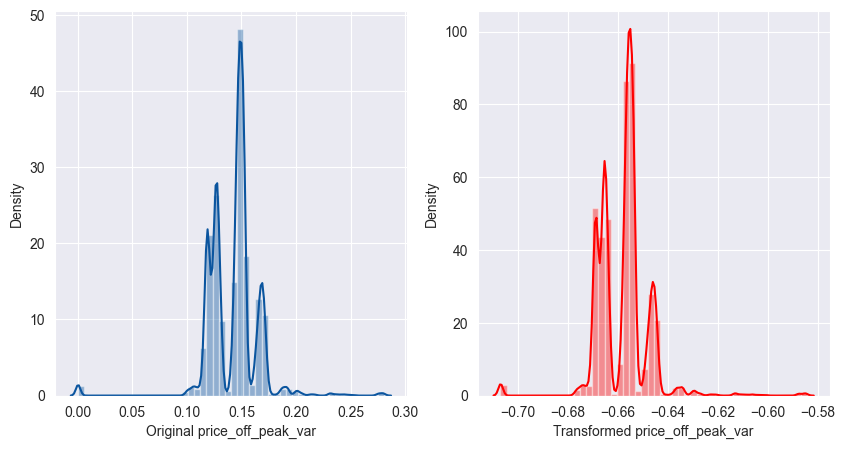

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'price_peak_var' . Skewness = -0.02


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


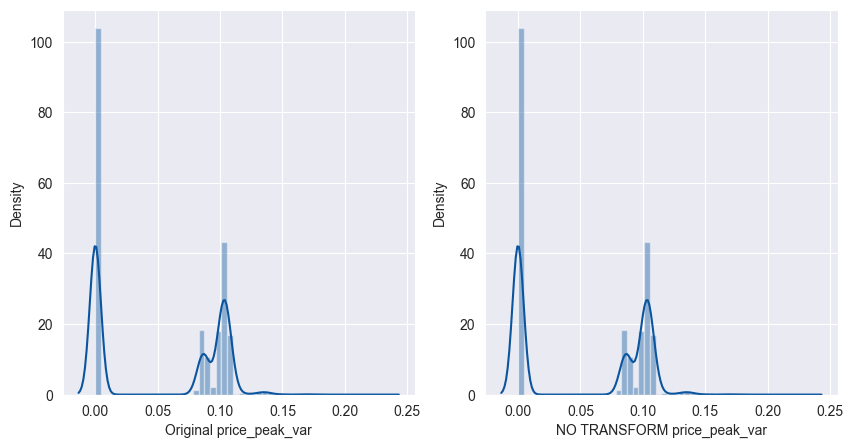

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'price_mid_peak_var' had 'positive' skewness of 0.51

 Transformation yielded skewness of 0.49


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


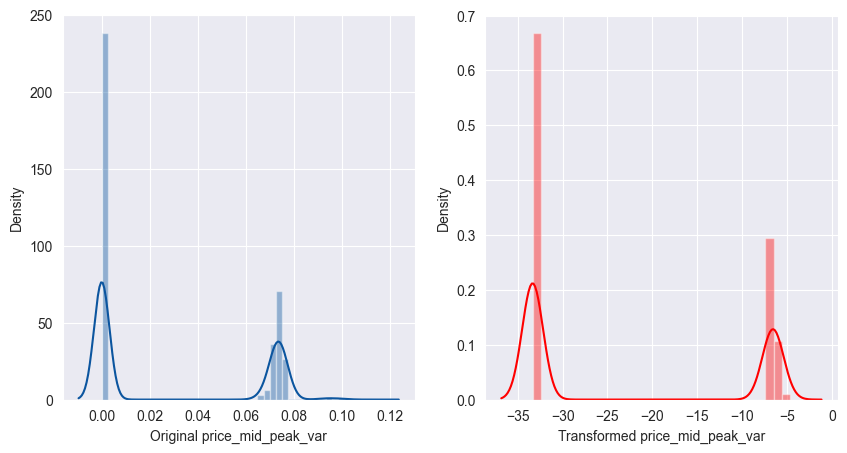

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'price_off_peak_fix' had 'negative' skewness of -5.35

 Transformation yielded skewness of 0.68


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


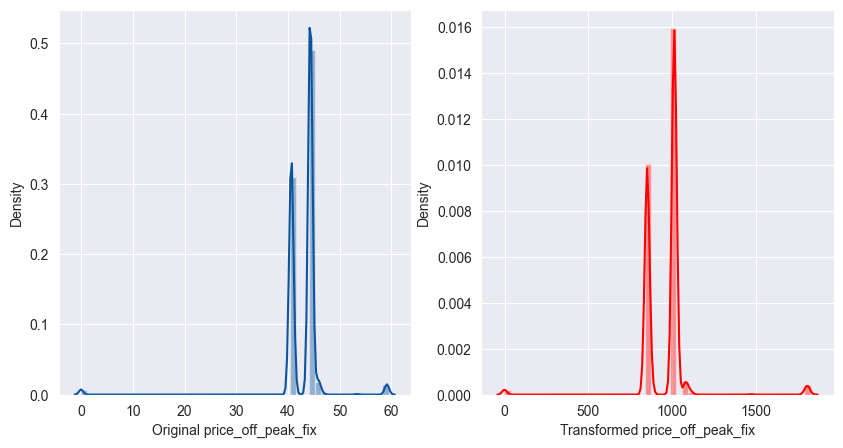

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'price_peak_fix' had 'positive' skewness of 0.54

 Transformation yielded skewness of 0.49


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


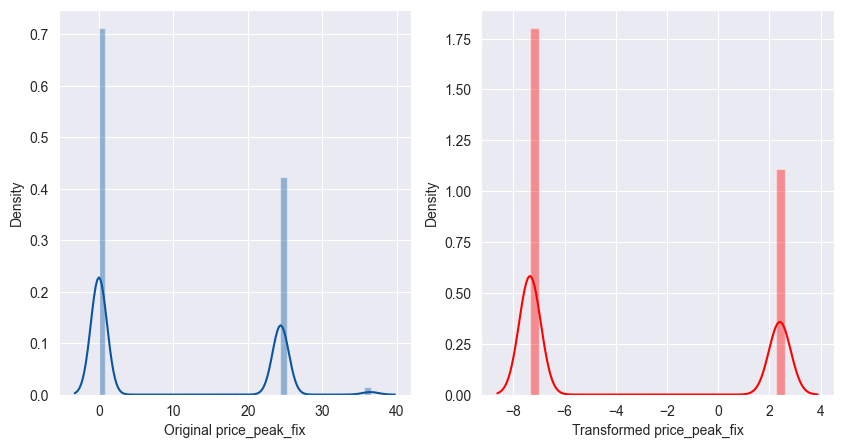

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'price_mid_peak_fix' had 'positive' skewness of 0.52

 Transformation yielded skewness of 0.49


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


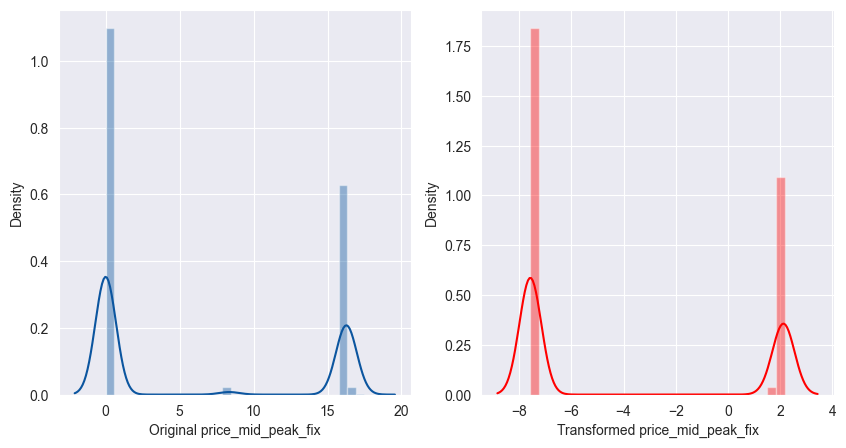

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'offpeak_diff_dec_january_energy' had 'positive' skewness of 3.38

 Transformation yielded skewness of 1.38


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


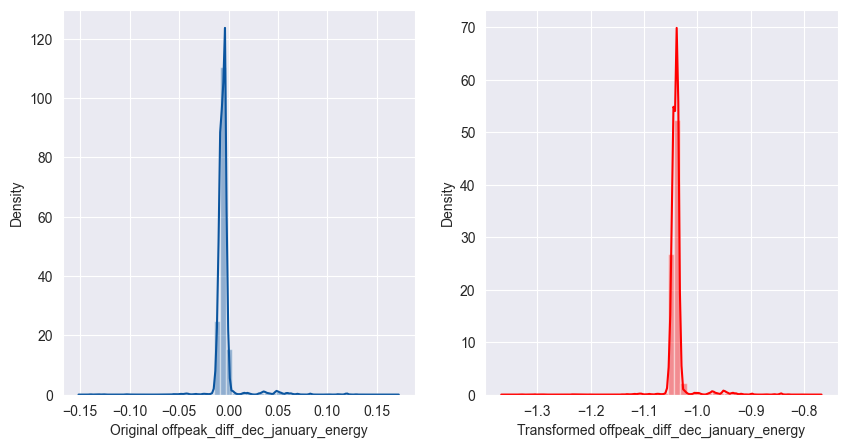

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'offpeak_diff_dec_january_power' had 'negative' skewness of -9.29

 Transformation yielded skewness of 7.14


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


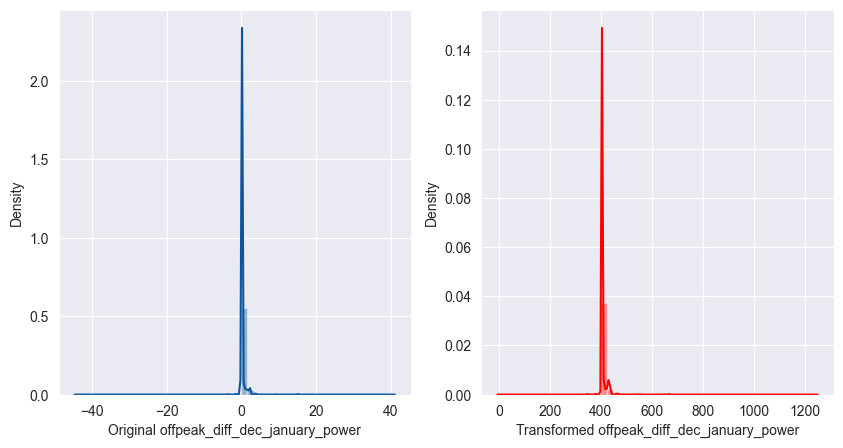

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'tenure' had 'positive' skewness of 1.24

 Transformation yielded skewness of -0.00


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


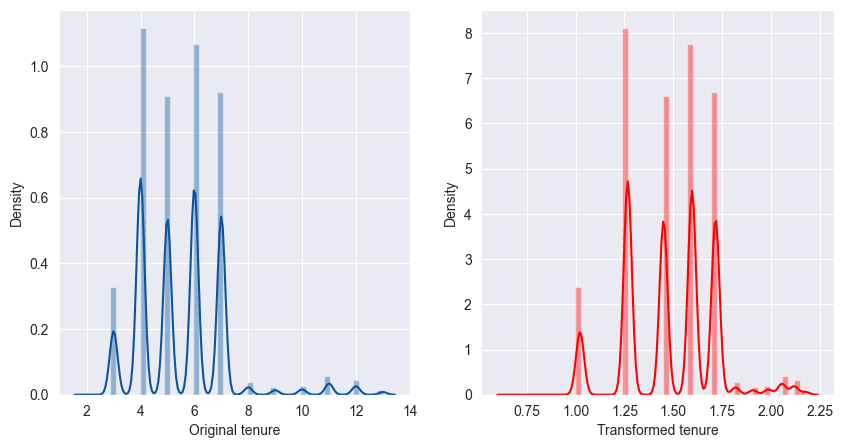

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'active_Year' had 'positive' skewness of 1.24

 Transformation yielded skewness of 0.00


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


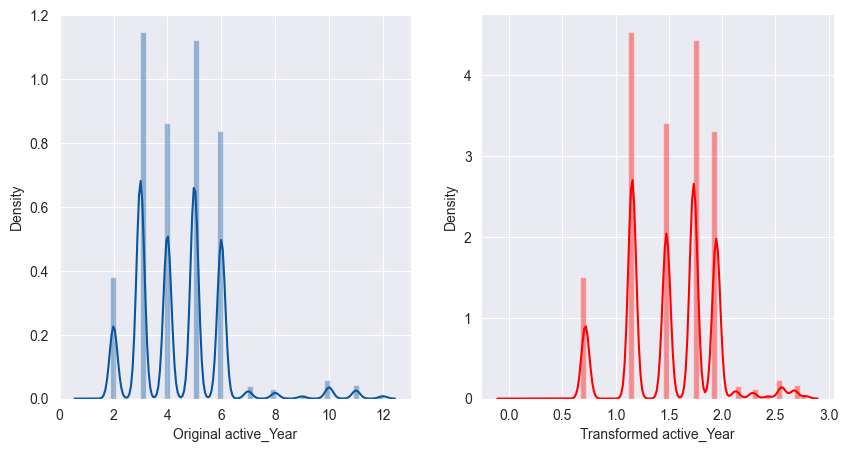

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'end_Year' had 'negative' skewness of -3.54

 Transformation yielded skewness of -3.54


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


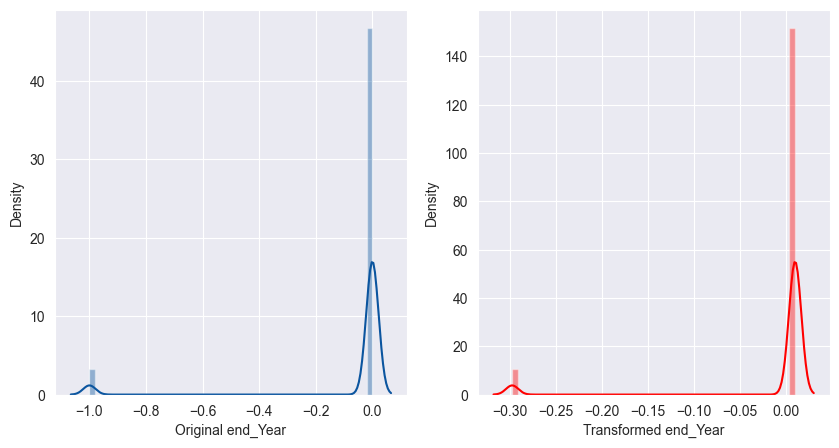

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'modif_prod_Year' had 'positive' skewness of 0.65

 Transformation yielded skewness of -0.39


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


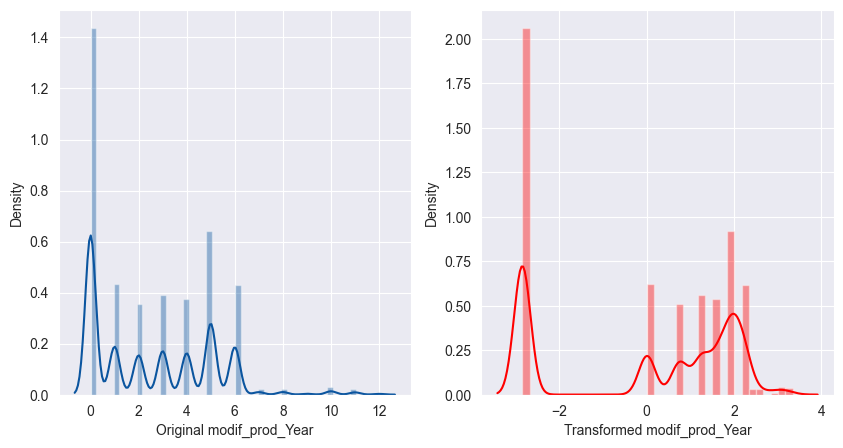

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'renewal_Year' had 'positive' skewness of 7.69

 Transformation yielded skewness of 6.76


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


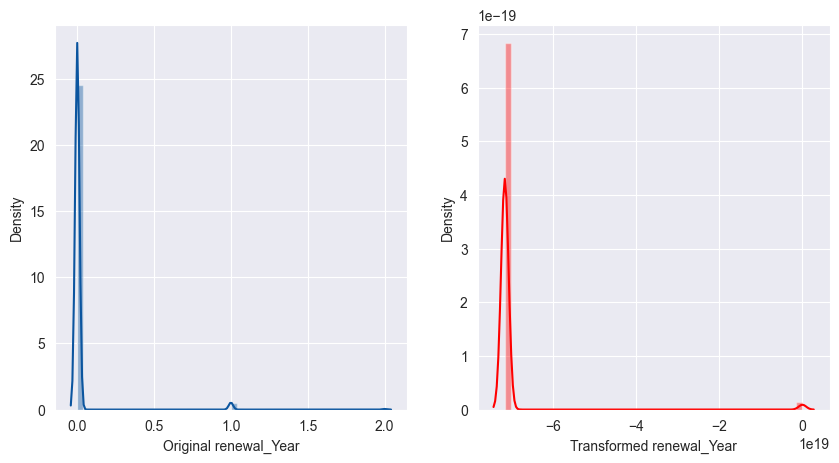

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\Ap


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'price_Year' . Skewness = 0.00


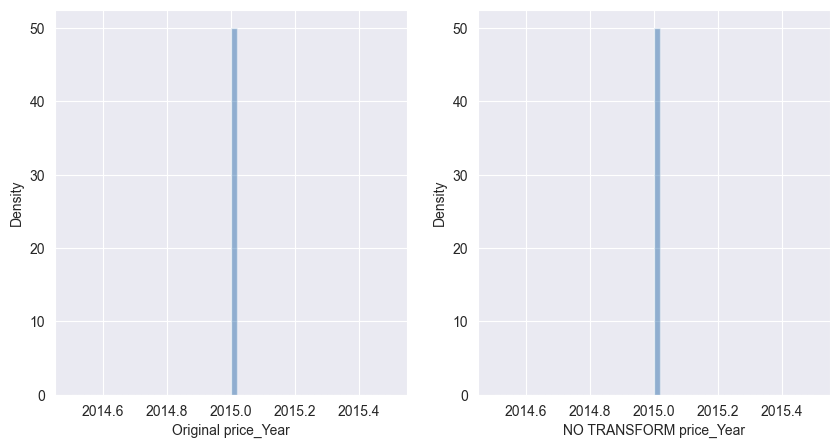

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'active_Month' had 'positive' skewness of 1.37

 Transformation yielded skewness of 0.00


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


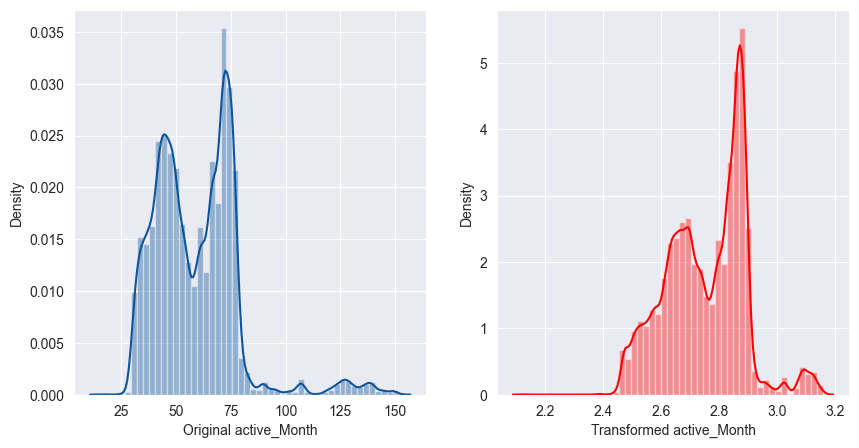

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'end_Month' . Skewness = 0.04


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


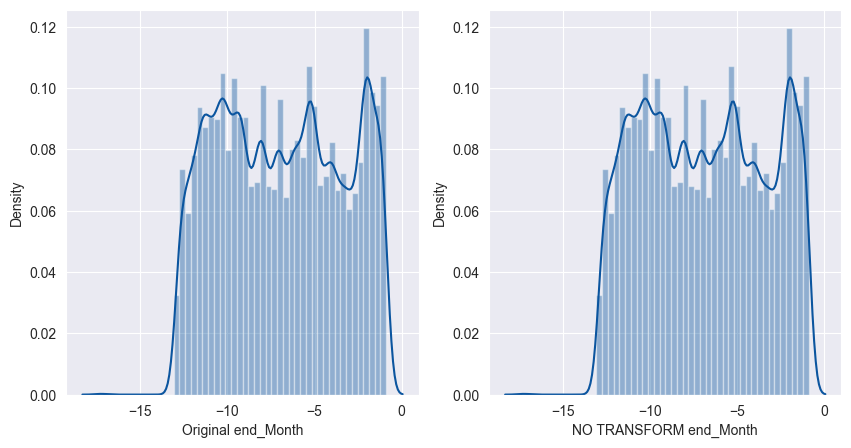

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'modif_prod_Month' had 'positive' skewness of 0.59

 Transformation yielded skewness of -0.20


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


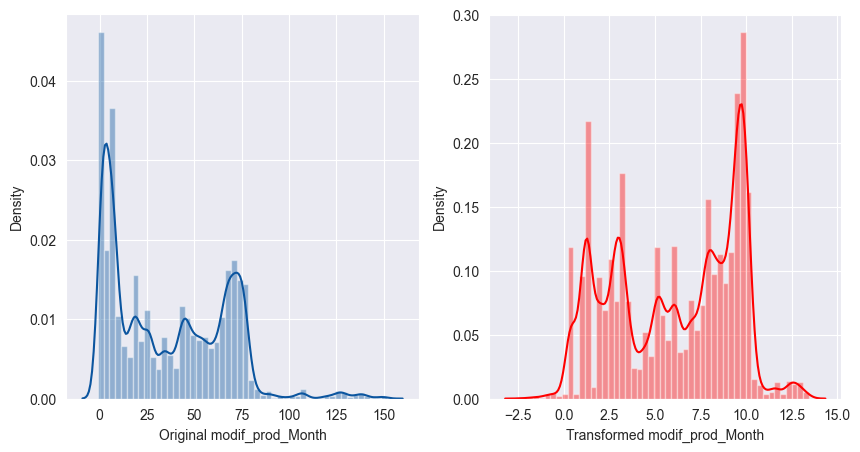

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'renewal_Month' had 'positive' skewness of 0.63

 Transformation yielded skewness of -0.15


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


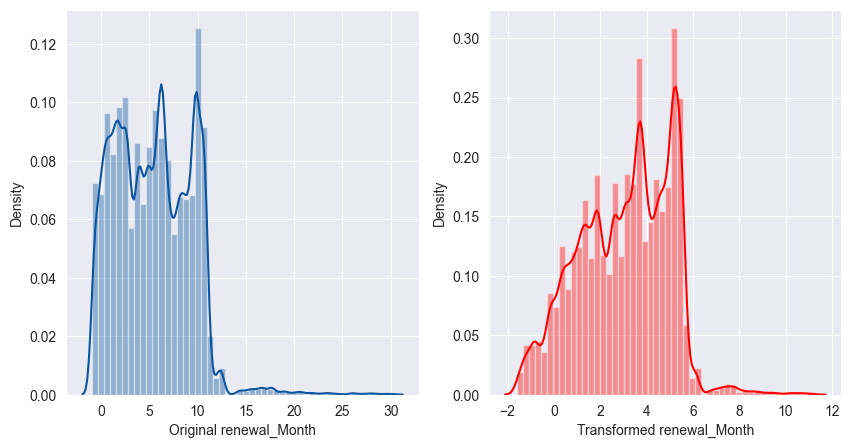

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'price_Month' . Skewness = -0.00


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


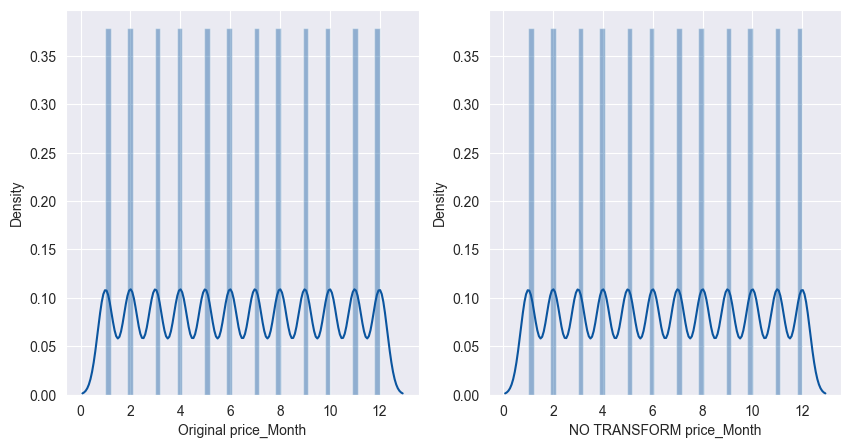

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



 ------------------------------------------------------

 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu' had 'positive' skewness of 69.73

 Transformation yielded skewness of nan


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


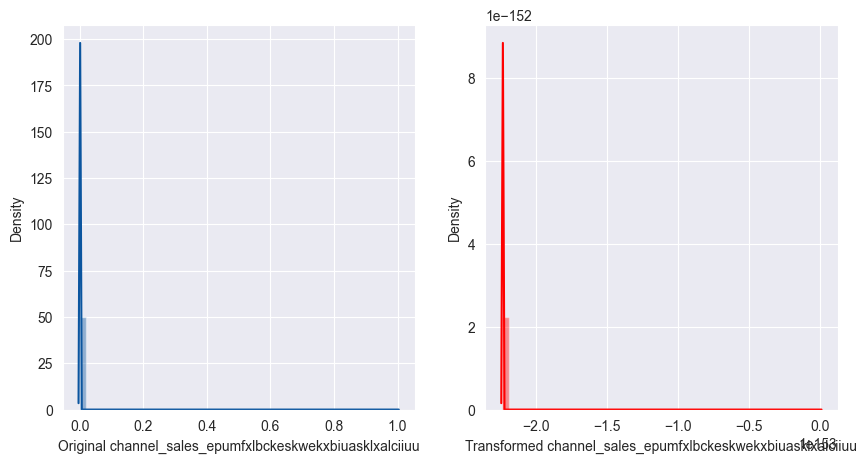

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci' had 'positive' skewness of 3.66

 Transformation yielded skewness of 3.66


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


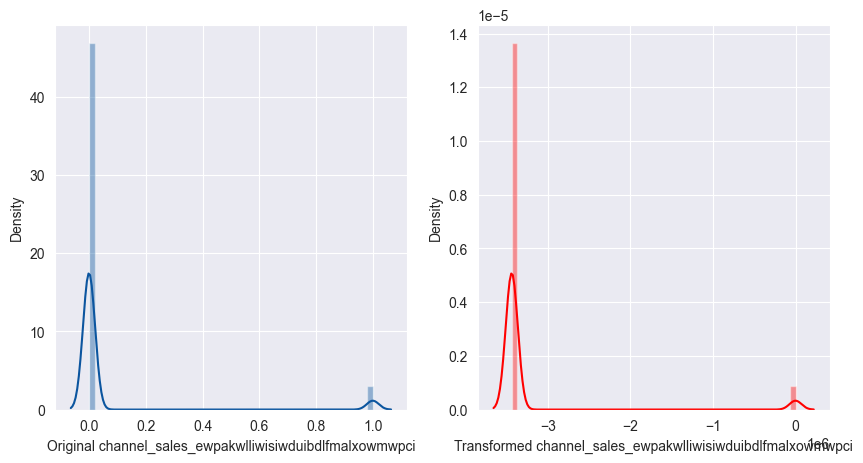

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



 ------------------------------------------------------

 'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa' had 'positive' skewness of 85.41

 Transformation yielded skewness of nan


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


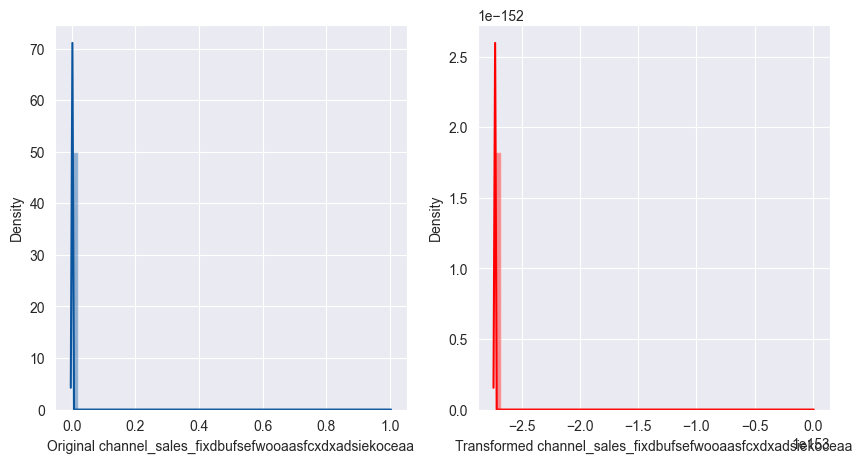

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua' . Skewness = 0.15


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


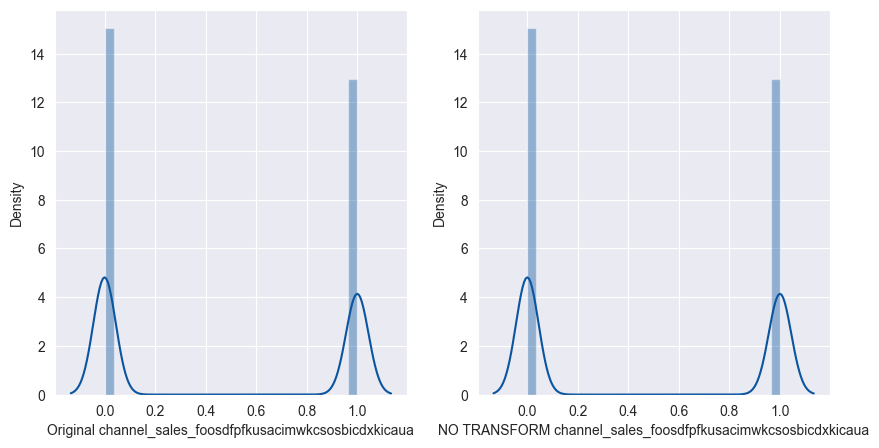

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'channel_sales_lmkebamcaaclubfxadlmueccxoimlema' had 'positive' skewness of 2.25

 Transformation yielded skewness of 2.25


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


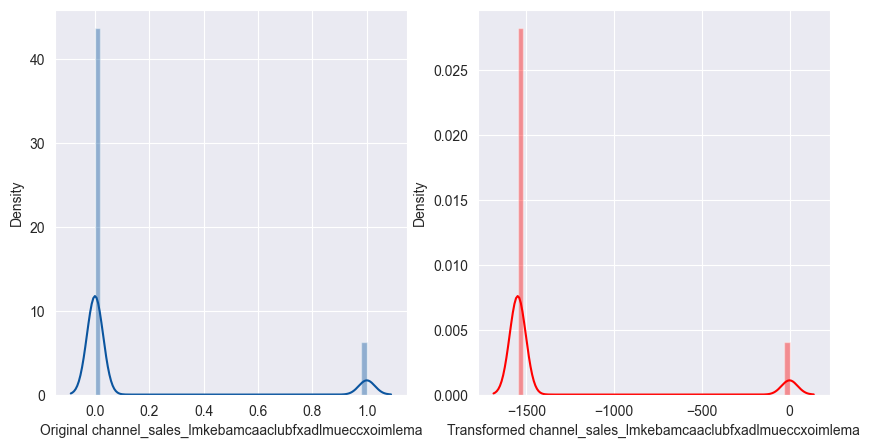

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_optimize.py:2322: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



 ------------------------------------------------------

 'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds' had 'positive' skewness of 36.52

 Transformation yielded skewness of nan


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


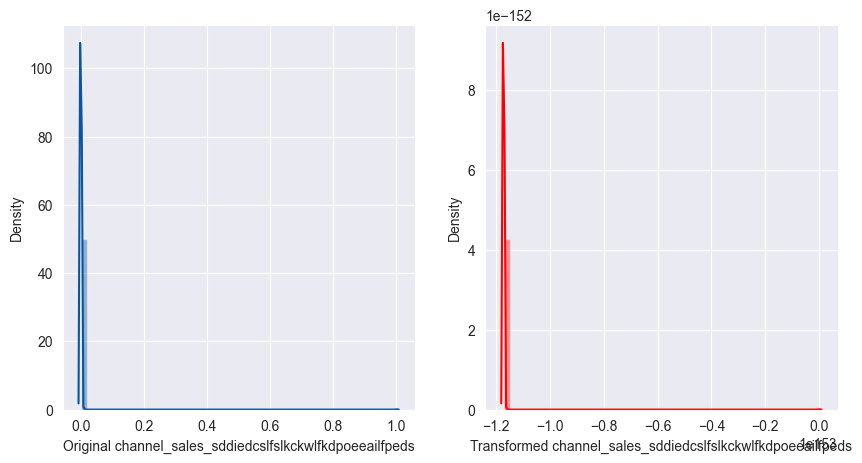

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'channel_sales_usilxuppasemubllopkaafesmlibmsdf' had 'positive' skewness of 2.78

 Transformation yielded skewness of 2.78


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


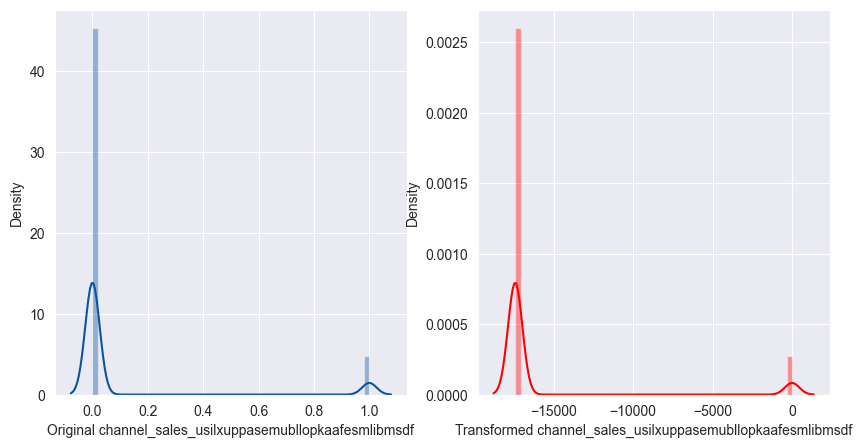

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



 ------------------------------------------------------

 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce' had 'positive' skewness of 120.80

 Transformation yielded skewness of nan


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


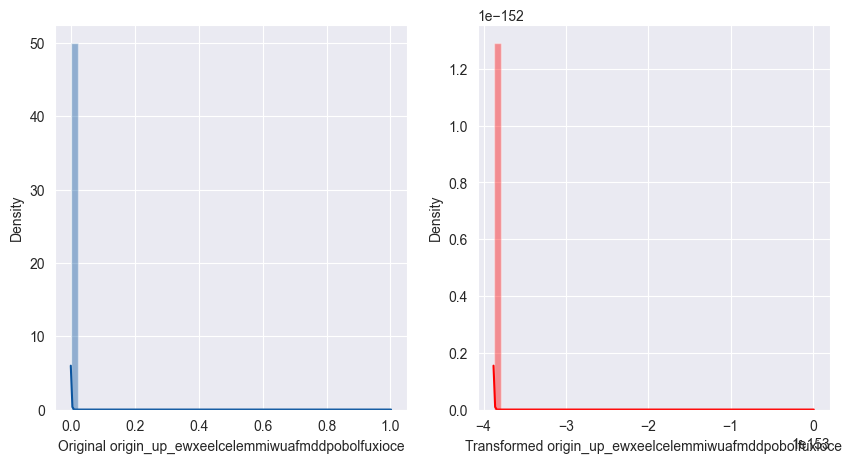

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws' had 'positive' skewness of 0.90

 Transformation yielded skewness of 0.90


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


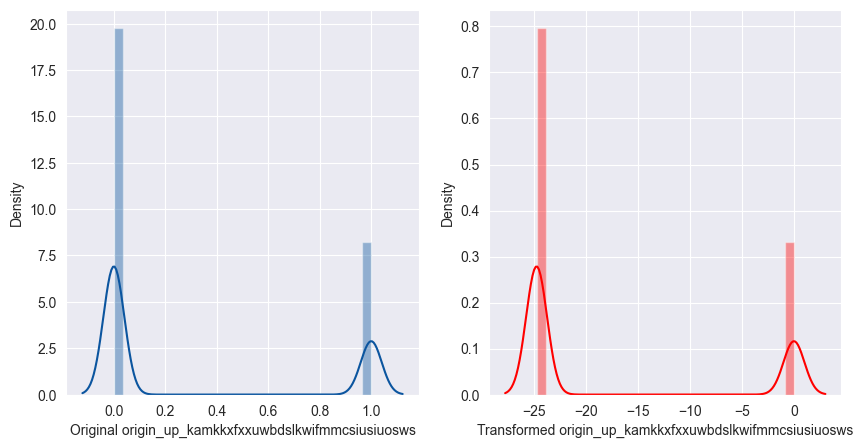

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'origin_up_ldkssxwpmemidmecebumciepifcamkci' had 'positive' skewness of 1.38

 Transformation yielded skewness of 1.38


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


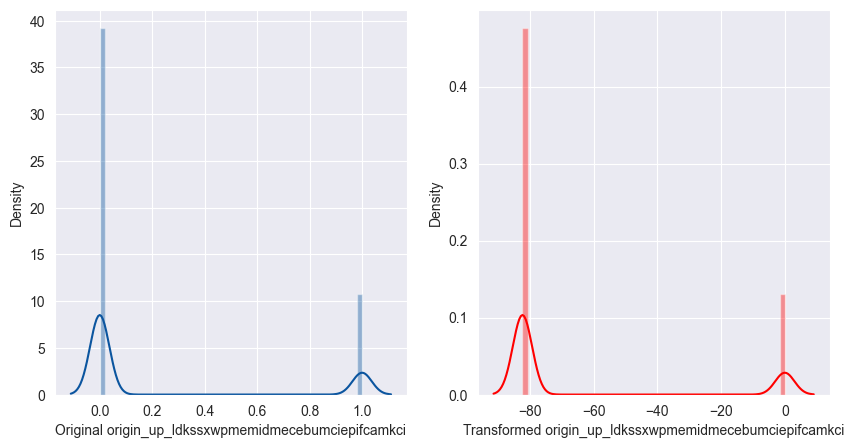

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'origin_up_lxidpiddsbxsbosboudacockeimpuepw' . Skewness = 0.06


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


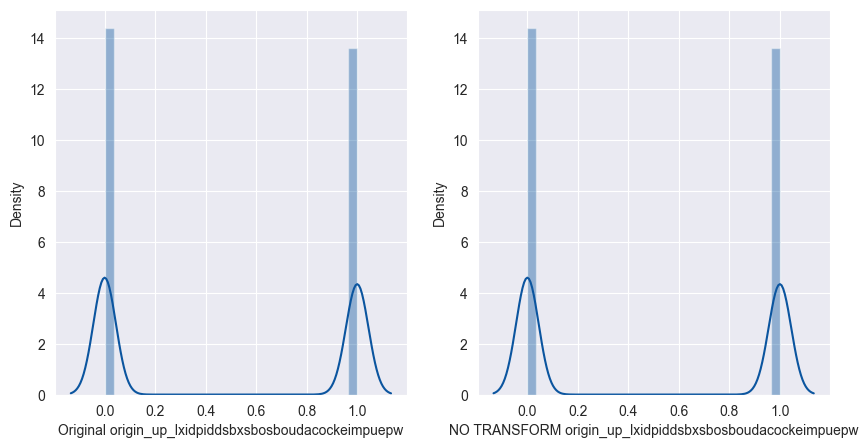

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



 ------------------------------------------------------

 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp' had 'positive' skewness of 85.41

 Transformation yielded skewness of nan


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


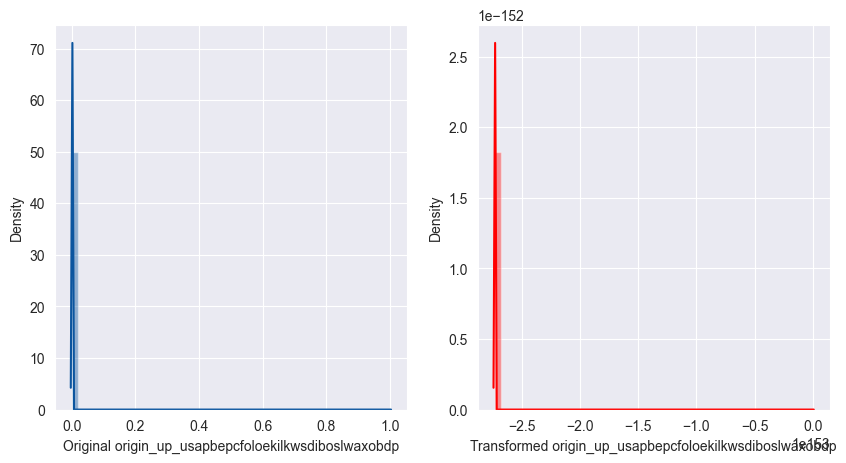

Original average skewness value was 11.66
Average skewness after transformation is 1.08


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\pandas\core\nanops.py:1206: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\pandas\core\nanops.py:1218: RuntimeWarning: overflow encountered in double_scalars
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


In [31]:
transformedDF = skew_autotransform(df_merged.copy(deep=True), plot = True, exp = False, threshold = 0.5)

print('Original average skewness value was %2.2f' %(np.mean(abs(df_merged.skew()))))
print('Average skewness after transformation is %2.2f' %(np.mean(abs(transformedDF.skew()))))

In [40]:
# Scalling or normalizing the df

transformedDF.var().round(2)

cons_12m                                           1.612000e+01
cons_gas_12m                                       3.210000e+01
cons_last_month                                    5.532000e+01
forecast_cons_12m                                  8.791000e+01
forecast_cons_year                                 4.131000e+01
forecast_discount_energy                           6.807320e+11
forecast_meter_rent_12m                            1.550000e+01
forecast_price_energy_off_peak                     0.000000e+00
forecast_price_energy_peak                         0.000000e+00
forecast_price_pow_off_peak                        1.793855e+04
has_gas                                            4.921890e+03
imp_cons                                           2.469000e+01
margin_gross_pow_ele                               7.150000e+00
margin_net_pow_ele                                 7.150000e+00
nb_prod_act                                        1.000000e-02
net_margin                              

***Standardize the values above as some values are large and cannot be processed by our Random forest regressor***

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(transformedDF)

columns=df_merged.columns.to_list()

# Transform
transformedDF = pd.DataFrame(scaler.transform(transformedDF),columns=columns)

In [83]:
# Feature Selection with Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

X = transformedDF.drop('churn', axis=1)
y = transformedDF['churn']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

(<Figure size 1500x1000 with 1 Axes>, <AxesSubplot:>)

<BarContainer object of 49 artists>

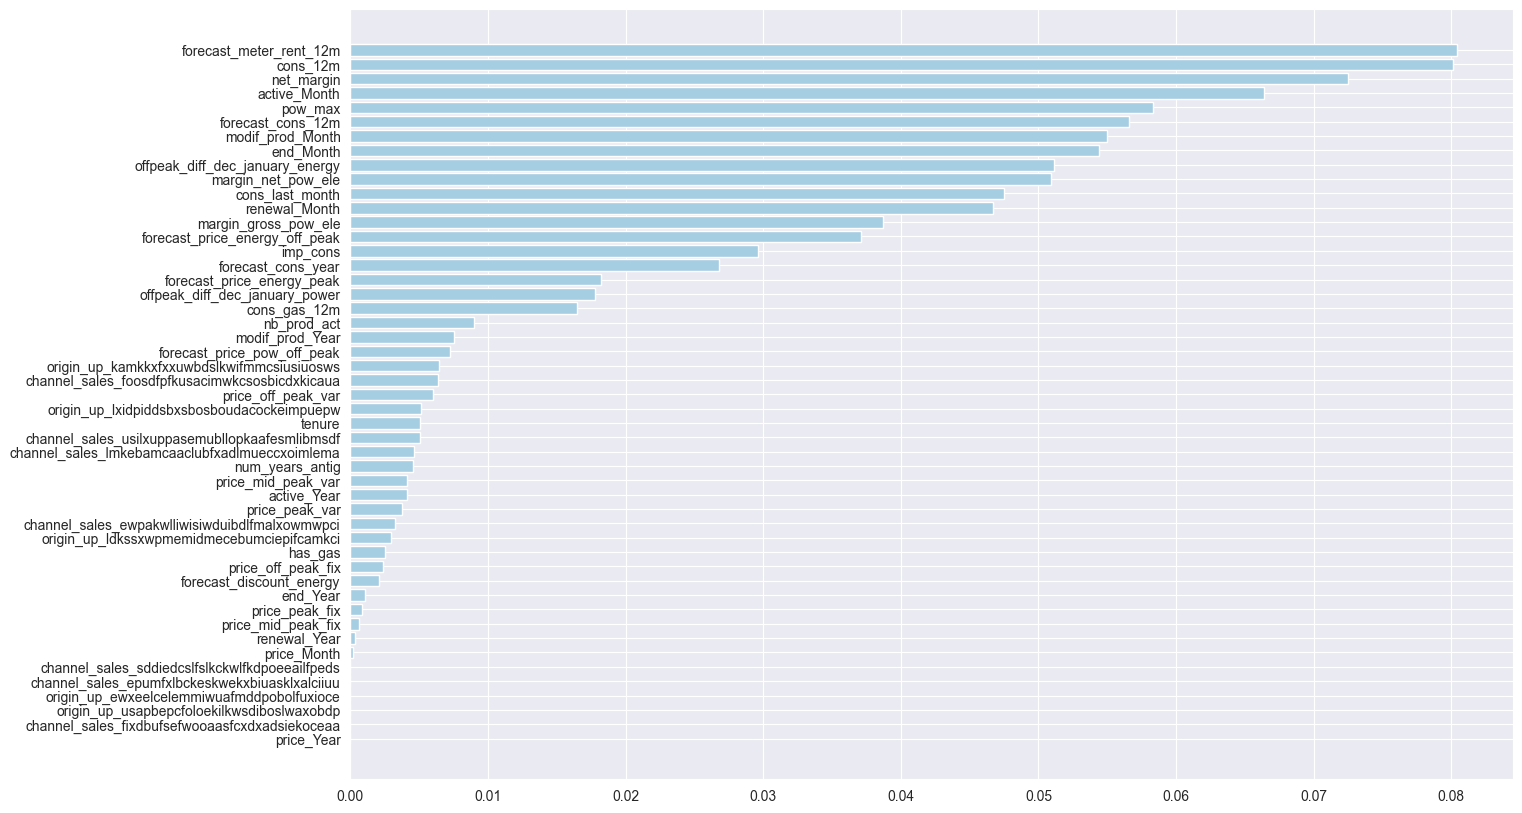

In [82]:
plt.subplots(figsize=(15,10))
f_i = list(zip(X_train.columns.values,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
# Select features

In [68]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_mean_squared_error')

In [86]:
selected_features = np.array(X_train.columns.values)[rfe.get_support()]
selected_features

array(['cons_last_month', 'end_Month', 'price_Month'], dtype=object)

In [73]:
#Lets save the model

import pickle

pickle.dump('rfe', open('rfe', 'wb'))
pickle.dump('rf', open('rf', 'wb'))

In [109]:
# Dropping features (will revisit if the model is not performing well at the later stages)

final_features = ['margin_net_pow_ele','offpeak_diff_dec_january_energy','end_Month', 
                  'modif_prod_Month','forecast_cons_12m','pow_max','active_Month',
                  'net_margin','cons_12m','forecast_meter_rent_12m','churn']
df = transformedDF[final_features]

In [110]:
df.head(2)

margin_net_pow_ele  offpeak_diff_dec_january_energy  end_Month  \
0            0.262569                         2.032458   0.400844   
1            0.262569                         2.032458   0.400844   

   modif_prod_Month  forecast_cons_12m   pow_max  active_Month  net_margin  \
0         -1.417305          -2.740011  1.918619     -2.077504    1.824162   
1         -1.417305          -2.740011  1.918619     -2.077504    1.824162   

   cons_12m  forecast_meter_rent_12m     churn  
0 -4.437665                -1.510629  3.049765  
1 -4.437665                -1.510629  3.049765

In [111]:
# Save final, cleaned with selected features

df.to_csv('df') 

In [113]:
target_df = df_merged['churn']
target_df.to_csv('target_df') 